<a href="https://colab.research.google.com/github/lureevnat/Data-Science-Algorithms/blob/master/Exploratory_Data_Analysis_Haberman_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Haberman dataset

# 1. Exploratory Data Analysis on Haberman dataset
link: https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/
1. Title: Haberman's Survival Data 

2. Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999 

3. Past Usage: 

    1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122. 

    2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. 

    3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI. 

4. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

5. Number of Instances: 306 

6. Number of Attributes: 4 (including the class attribute) 

7. Attribute Information: 
    1. Age of patient at time of operation (numerical) 
    2. Patient's year of operation (year - 1900, numerical) 
    3. Number of positive axillary nodes detected (numerical) 
    4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year 

8. Missing Attribute Values: None
## Objective:
The objective is to build a model which takes age, year and nodes of a person as input and predict whether that person will survive for more than 5 years or not.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman = pd.read_csv("haberman.csv")
print(haberman.shape)
print(list(haberman.columns))
print(haberman["status"].value_counts())
print("Number of datapoints with age:",haberman.age.count())
print("Number of datapoints with year:",haberman.year.count())
print("Number of datapoints with nodes:",haberman.nodes.count())

(306, 4)
['age', 'year', 'nodes', 'status']
1    225
2     81
Name: status, dtype: int64
Number of datapoints with age: 306
Number of datapoints with year: 306
Number of datapoints with nodes: 306


## Observations
1. The data set shape is (306,4), i.e. Dataset has 306 data points
2. The columns present in the dataset are Age, Year, Nodes, Status
3. Out of 306 datapoints, 225 belongs to class 1 and 81 belongs to class 2. So this          dataset is unbalanced dataset
4. There are no missing values.

#  Pair-plot

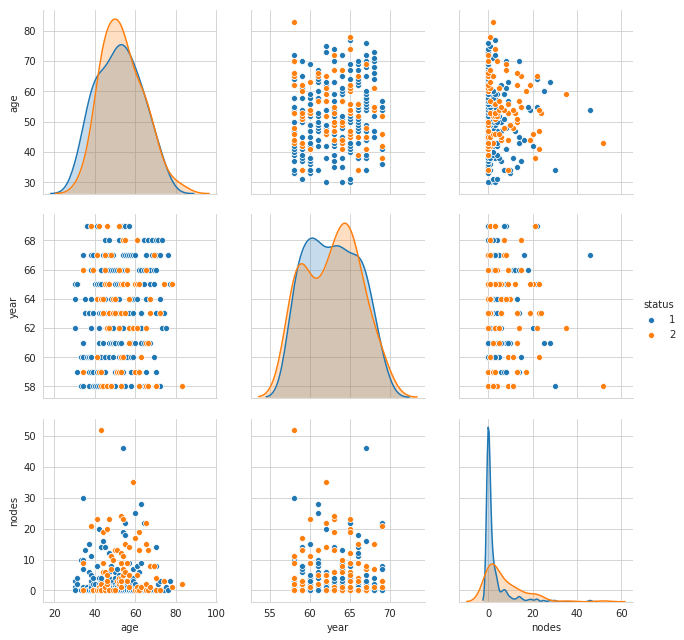

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",vars=np.array(('age','year','nodes')),diag_kind="auto", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Pair-plots are nothing but the set of all possible 2-d scatter plots and set of all possible pdf's

**Observations**
1. status 1 and status 2 data points in all the 2-d scatter plots presented above have so much overlap (can't be linearly seperable).
2. PDF's of Age, Year and nodes with status as 1 and status 2 are overlapping with each other. Hence no sense can be made from it.

# PDF, CDF

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]


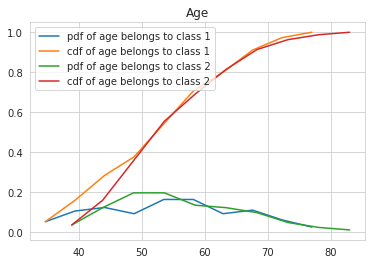

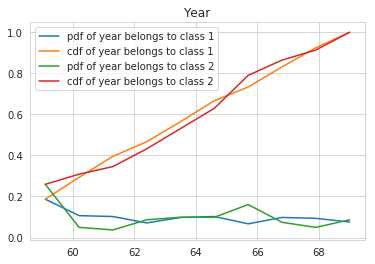

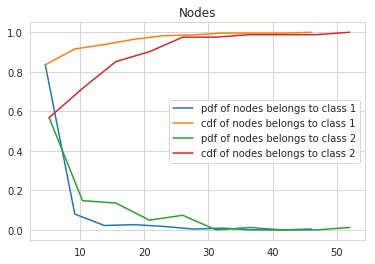

In [0]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

#status = 1, variable = age
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)

print(counts)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of age belongs to class 1")
plt.plot(bin_edges[1:], cdf,label="cdf of age belongs to class 1")


# status = 2, variable = age
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of age belongs to class 2")
plt.plot(bin_edges[1:], cdf,label="cdf of age belongs to class 2")
plt.legend()
plt.title("Age")
plt.show();


#status = 1, variable = year
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of year belongs to class 1")
plt.plot(bin_edges[1:], cdf,label="cdf of year belongs to class 1")


# status = 2, variable = year
counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of year belongs to class 2")
plt.plot(bin_edges[1:], cdf,label="cdf of year belongs to class 2")
plt.legend()
plt.title("Year")
plt.show();


#status = 1, variable = Nodes
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of nodes belongs to class 1")
plt.plot(bin_edges[1:], cdf,label="cdf of nodes belongs to class 1")


# status = 2, variable = Nodes
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of nodes belongs to class 2")
plt.plot(bin_edges[1:], cdf,label="cdf of nodes belongs to class 2")
plt.legend()
plt.title("Nodes")
plt.show();

**Observations**
1. The above graphs shows pdf's and cdf's of class 1 and class 2 drawn for all three independent variables. The pdf's of both classes are overlapping. Hence no much information can be extracted from them.

# Mean, Variance and Std-dev

In [0]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_1["age"],5000)));
print(np.mean(haberman_2["age"]))


print("\nStd-dev:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))

Means:
52.01777777777778
73.91150442477876
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


**Observations**
1. The Mean of age's with class 1 and class 2 are closer.
2. After adding outlier of 5000, there is a sudden increase in the mean from 52 to 73, hence mean can be easily disturbed by having outlier.
3. The standard deviation of class 1 and class 2 are closer.

# Median, Percentile, Quantile, IQR, MAD

In [0]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_1["age"]))
#Median with an outlier
print(np.median(np.append(haberman_1["age"],50)));
print(np.median(haberman_2["age"]))

print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))

print(haberman_2["age"].max())


Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816
83


**observation**
1. Median of Ages's with class 1 and Median of Age's with class 1 and with outlier are same. Hence we can say outlier doesn't effect Median.
2. For Ages with class 1, the quartiles(0%,25%,50%,75%) are at 30, 42, 52, 60 respectively
   For Ages with class 2, the quartiles are at 34, 46, 53, 61 respectively
3. For both classes The 90% percentile value is 67
4. The mean absolute deviation for the two classes are different

# Box plot and Whiskers

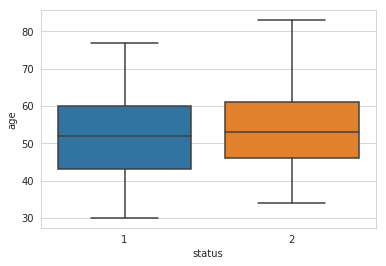

In [0]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

**observations**
Minumum
1. Median of Age's of patients belonging to class 1 is around 30.
2. Median of Age's of patients belonging to class 2 is around 33.

first quartile
1. first quartile of Age's of patients belonging to class 1 is around 43.
2. first quartile of Age's of patients belonging to class 2 is around 46.

Second quartile
1. Median of Age's of patients belonging to class 1 is around 52.
2. Median of Age's of patients belonging to class 2 is around 53.

Third quartile
1. Third Quartile of Age's of patients belonging to class 1 is around 60.
2. Third Quartile of Age's of patients belonging to class 2 is around 62.

Maximum
1. Maximum of Age's of patients belonging to class 1 is around 77.
2. Maximum of Age's of patients belonging to class 2 is around 84.

# Violin plots

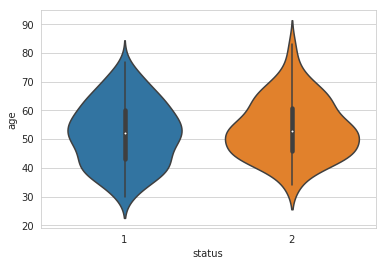

In [0]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

**observation**
The violin plot gives the combine information of boxplot and pdf's of variables.

# Contour plot

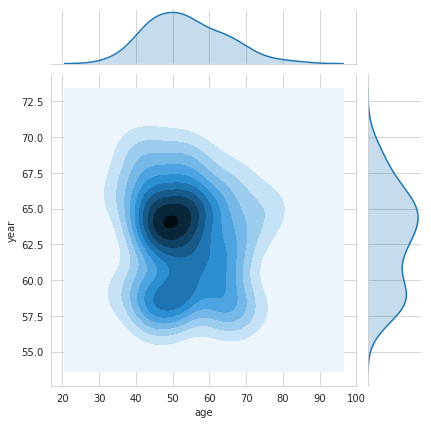

In [0]:
sns.jointplot(x="age", y="year", data=haberman_2, kind="kde");
plt.show();

**observation**

The contour plot drawn above is between age and year. It is observed that the patients who survived less than 5 years with age between 50 to 55 and with year between around 64 to 65 are more in the given dataset. The plot above and right side of contour plot gives the pdf's of respective features.

**Conclusion**

1. It can be observed that by doing the Exploratory data analysis, I came to know some of the insights of how the data is. How the data looking like. How are the distributions are.
2. Thus, whenever we start any data mining task we need to do EDA first weather you have domain knowledge or not.
3. I have presented pair plots, pdf's, cdf's, boxplot, violin plot, coutour plot and calculated mean, variance, standard deviations, median, quantiles, percentiles, IQR for haberman dataset